In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X : (ndarray): Shape (m,n) matrix of examples with multiple features
      w : (ndarray): Shape (n)   parameters for prediction   
      b : (scalar):              parameter  for prediction   
    Returns
      cost: (scalar)             cost
    """

    # number of example
    m = X.shape[0]

    # compute the cost vector-wise
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2
    cost /= (2 * m)
    
    return np.squeeze(cost)

In [3]:
def compute_gradient_matrix(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (array_like Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (scalar )                Values of parameter of the model      
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
                                  
    """

    # number of examples
    m = X.shape[0]

    # compute the gradient matrix-wise
    f_wb = X @ w + b    # matrix multiplication
    e = f_wb - y    # error for each target
    dj_dw = (X.T @ e) / m
    dj_db = np.sum(e) / m

    return dj_dw, dj_db

In [4]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
  """
  Performs batch gradient descent to learn theta. Updates theta by taking 
  num_iters gradient steps with learning rate alpha
  
  Args:
    X : (array_like Shape (m,n)    matrix of examples 
    y : (array_like Shape (m,))    target value of each example
    w_in : (array_like Shape (n,)) Initial values of parameters of the model
    b_in : (scalar)                Initial value of parameter of the model
    alpha : (float) Learning rate
    num_iters : (int) number of iterations to run gradient descent
  Returns
    w : (array_like Shape (n,)) Updated values of parameters of the model after
        running gradient descent
    b : (scalar)                Updated value of parameter of the model after
        running gradient descent
  """

  # number of examples
  m = len(X)

  # An array to store values at each iteration primarily for graphing later
  hist = {
      "cost": [],
      "params": [],
      "grads": [],
      "iter": [],
  }
  b = b_in
  w = copy.deepcopy(w_in) #avoid modifying global w within function
  save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

  for i in range(num_iters):

    # Calculate the gradient and update the parameters
    dj_dw, dj_db = compute_gradient_matrix(X, y, w, b)

    # Update parameters
    w -= (alpha * dj_dw)
    b -= (alpha * dj_db)

    # Save cost J,w,b at each save interval for graphing
    if i == 0 or i % save_interval == 0:  
      hist["cost"].append(compute_cost(X, y, w, b))
      hist["params"].append([w,b])
      hist["grads"].append([dj_dw,dj_db])
      hist["iter"].append(i)

  return w, b, hist    

In [5]:
def run_gradient_descent(X, y, iterations, alpha):
    m,n = X.shape
    # initialize parameters
    w_initial = np.zeros(n)
    b_initial = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, w_initial, b_initial, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    
    return(w_out, b_out)

Text(0.5, 1.0, 'no feature engineering')

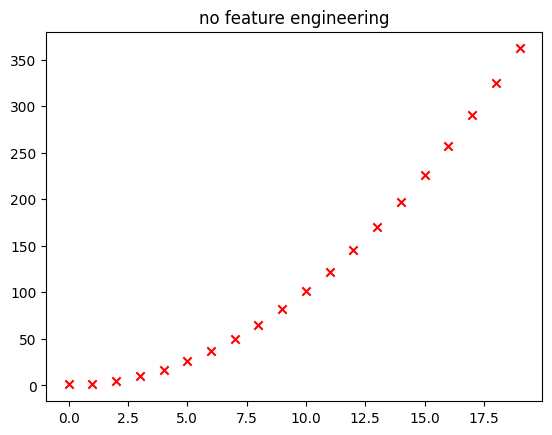

In [6]:
# create dataset
x = np.arange(0, 20, 1)
y = x ** 2 + 1

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")

w,b found by gradient descent: w: [18.69806954], b: -52.0834


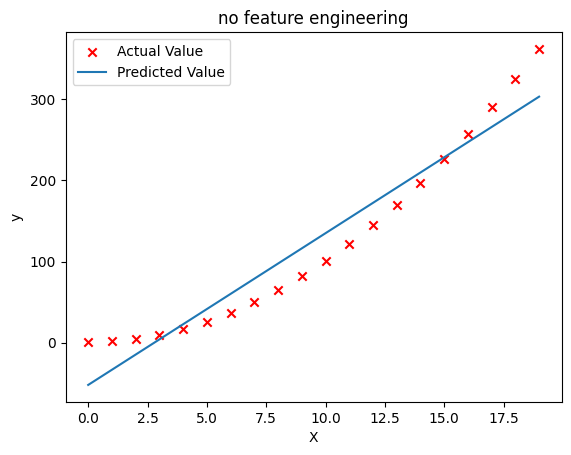

In [7]:
X = x.reshape(-1, 1)

w_linear, b_linear = run_gradient_descent(X, y, 1000, 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x, X@w_linear + b_linear, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

w,b found by gradient descent: w: [1.00435057], b: 0.0090


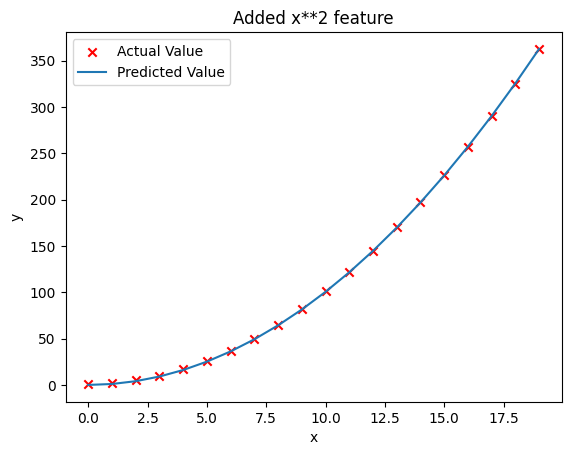

In [8]:
# create dataset
x = np.arange(0, 20, 1)
y = x ** 2 + 1

# Engineer features
X = x**2      #<-- added engineered feature

# number of examples
X = X.reshape(-1, 1)

# run polynomial regression using gradient descent
w_poly, b_poly = run_gradient_descent(X, y, 1000, 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,w_poly) + b_poly, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

w,b found by gradient descent: w: [0.01166045 0.07760103 0.0552212 ], b: 0.0015


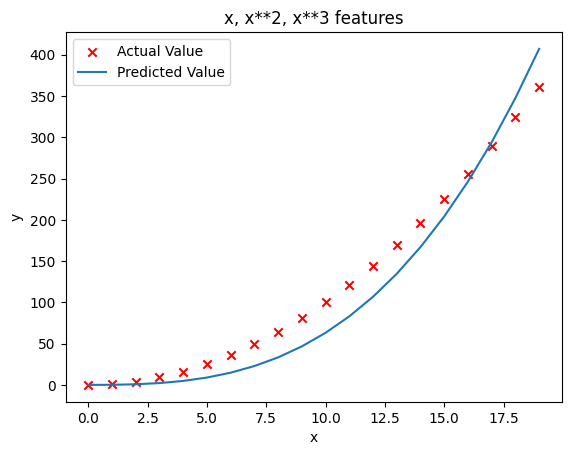

In [9]:
# create dataset
x = np.arange(0, 20, 1)
y = x ** 2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

# run polynomial regression using gradient descent
w_poly, b_poly = run_gradient_descent(X, y, 1000, 1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@w_poly + b_poly, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

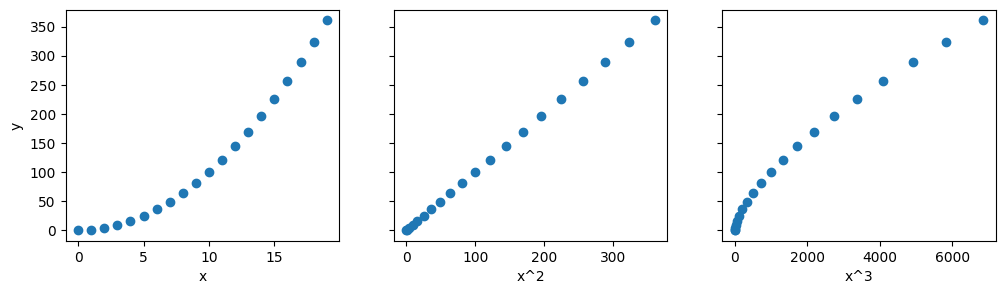

In [10]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [11]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """

    # find the mean of each colum/feature
    mu = np.mean(X, axis=0)     # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0)   # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm)

w,b found by gradient descent: w: [ 7.67449373 93.94625791 12.28868959], b: 123.5000


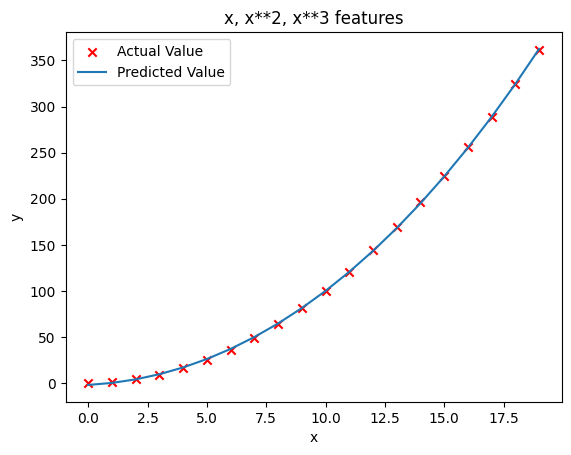

In [12]:
# create target data
x = np.arange(0,20,1)
y = x ** 2
X = np.c_[x, x**2, x**3]

# add mean_normalization 
X = zscore_normalize_features(X)

# run polynomial regression using gradient descent
w_poly, b_poly = run_gradient_descent(X, y, 10000, 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@w_poly + b_poly, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Text(0.5, 1.0, 'Normalized x x**2, ..., x**13 feature')

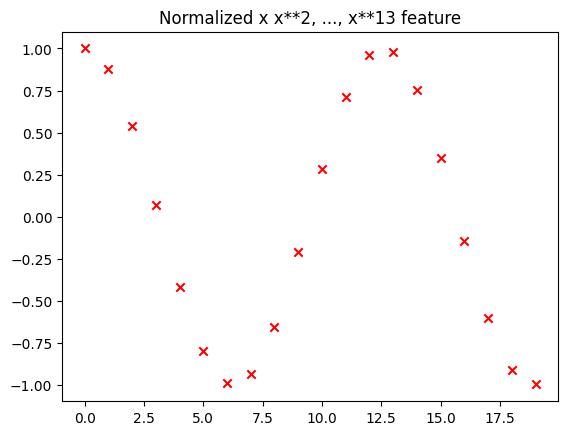

In [13]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, ..., x**13 feature")

w,b found by gradient descent: w: [-1.61035138e+00 -1.00624795e+01  3.00029328e+01 -6.91665020e-01
 -2.36908018e+01 -1.51363834e+01  2.08722991e+01 -2.29331209e-03
 -4.68700607e-03  5.51048134e-02  1.06934475e-01 -2.52628726e-02
  6.48762638e-02], b: -0.0073


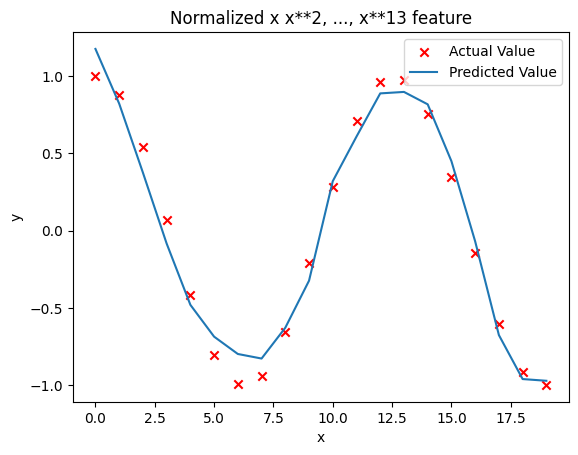

In [14]:
# run polynomial regression using gradient descent
w_complex, b_complex = run_gradient_descent(X, y, 1000000, 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, ..., x**13 feature")
plt.plot(x,X@w_complex + b_complex, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()